In [75]:
import pandas as pd
from pprint import pprint
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [76]:
df = pd.read_csv('./temp2.csv', names=['movieName', 'director', 'company', 'distributor', 'openDt',
                                        'type1', 'type2', 'genre', 'grade', 'num_actors', 'num_staffs', 'running_time',
                                        'top3_actors', 'num_screen', 'num_seats', 'seoul_seats', 'num_sales','seoul_sales',
                                        'director_prev_movie_num', 'director_prev_movie_seats_num', 'director_prev_max_seats_num', 'actors_prev_seats_num'])
df.drop(['num_screen', 'num_sales', 'seoul_sales'], axis=1, inplace=True)


df.shape

(3191, 19)

In [77]:
import numpy as np
np.unique(df['genre'])

array(['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬',
       '미스터리', '범죄', '사극', '서부극(웨스턴)', '성인물(에로)', '스릴러', '애니메이션', '액션',
       '어드벤처', '전쟁', '코미디', '판타지'], dtype=object)

In [78]:
import matplotlib
matplotlib.rcParams['font.family'] ='NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] =False

<AxesSubplot:>

Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
Glyph 47708 (\N{HANGUL SYLLABLE MEL}) missing from current font.
Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
Glyph 47592 (\N{HANGUL SYLLABLE MAEN}) missing from current font.
Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from current font.
Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
Glyph 53328 (\N{HANGUL SYLLABLE KYU}) missing from current font.
Glyph 47704 (\N{HANGUL SYLLABLE MEN}) missing from current font.
Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
Glyph 50529 (\N{HANGUL SYLLABLE 

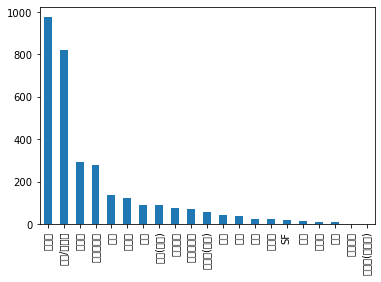

In [79]:
df['genre'].value_counts().plot(kind='bar')

In [80]:
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

def preprocess_company(company):
    replace_dict = {'㈜':'', '(주)':'', '주식회사': '', '(유)': ''}
    com_list = company.split(',')
    com_list = [replace_all(com,replace_dict).strip() for com in com_list]
    return com_list[0]

def preprocess_grade(grade):
    grade = grade.strip()
    grade_dict = {'전체관람가':0, 
                  '12세관람가': 1, 
                  '12세이상관람가':1, 
                  '15세관람가':2, 
                  '15세이상관람가':2, 
                  '18세관람가':3, 
                  '청소년관람불가':3, 
                  '제한상영가' : 3}
    
    return grade_dict[grade]

def split_actors(x, idx):
    result = x.split(',')
    if len(result) > idx:
        return result[idx]
    else:
        return None
    
def split_date(x):
    result = x.split('-')
    return int(result[1])

director_le = LabelEncoder()
type1_le = LabelEncoder()
type2_le = LabelEncoder()
genre_le = LabelEncoder()
company_le = LabelEncoder()
distributor_le = LabelEncoder()
actor1_le = LabelEncoder()
actor2_le = LabelEncoder()
actor3_le = LabelEncoder()


df['actor1']= df['top3_actors'].apply(split_actors, idx=0)
df['actor2']= df['top3_actors'].apply(split_actors, idx=1)
df['actor3']= df['top3_actors'].apply(split_actors, idx=2)

df['company'] = df['company'].apply(lambda x : preprocess_company(x))
df['distributor'] = df['distributor'].apply(lambda x : preprocess_company(x))
df['grade'] = df['grade'].apply(lambda x : preprocess_grade(x))
df['openMonth'] = df['openDt'].apply(split_date)

df.dropna(axis=0, inplace=True)
df.drop(['top3_actors'], axis=1, inplace=True)

df['director'] = director_le.fit_transform(df['director'])
df['type1'] = type1_le.fit_transform(df['type1'])
df['type2'] = type2_le.fit_transform(df['type2'])
df['genre'] = genre_le.fit_transform(df['genre'])
df['company'] = company_le.fit_transform(df['company'])
df['distributor'] = distributor_le.fit_transform(df['distributor'])
df['actor1'] = actor1_le.fit_transform(df['actor1'])
df['actor2'] = actor2_le.fit_transform(df['actor2'])
df['actor3'] = actor3_le.fit_transform(df['actor3'])


df.shape

(2446, 22)

In [81]:
X = df[['director', 'company', 'distributor', 'type1', 'type2', 'genre', 'grade', 'num_actors', 'num_staffs', 'running_time', 
        'actor1', 'actor2', 'actor3', 'openMonth', 'director_prev_movie_num', 'director_prev_movie_seats_num', 
        'director_prev_max_seats_num', 'actors_prev_seats_num', 'openDt' ]]
y = df[['num_seats']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state= 42)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

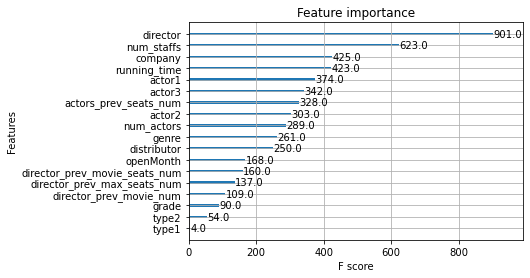

In [82]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb_model.fit(x_train.iloc[:,:-1], y_train)
xgb.plot_importance(xgb_model)

MSE: 1301177357911.12
RMSE: 1140691.61
MAE: 498056.26


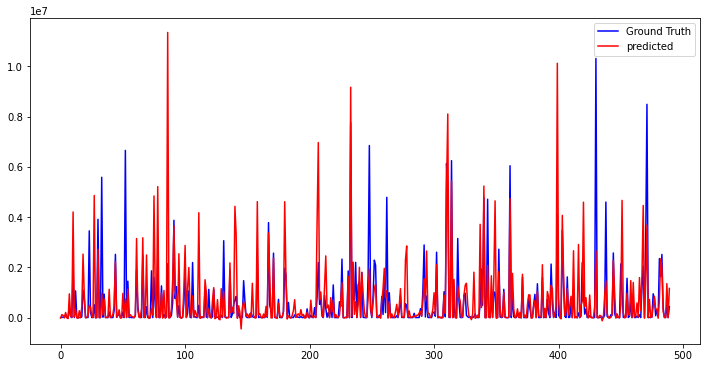

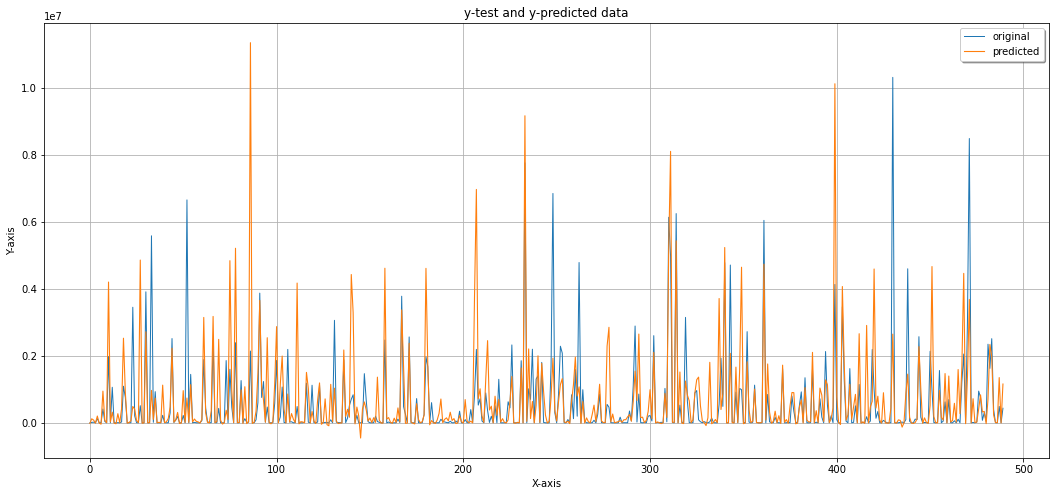

In [83]:
import matplotlib.pyplot as plt

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

predictions = xgb_model.predict(x_test.iloc[:,:-1])
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))
print("MAE: %.2f" % mae)

plt.figure(figsize=(12, 6))
plt.plot([i for i in range(len(y_test))], y_test.values, color="blue", label="Ground Truth")
plt.plot([i for i in range(len(y_test))], predictions, color="red", label="predicted")
plt.legend()
plt.show()

plt.figure(figsize=(18, 8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test.values, linewidth=1, label="original")
plt.plot(x_ax, predictions, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [84]:
import shap
shap.initjs()

In [85]:
X_sample_sort_openDt = x_test.sort_values('openDt')

In [86]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_sample_sort_openDt.iloc[:,:-1])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


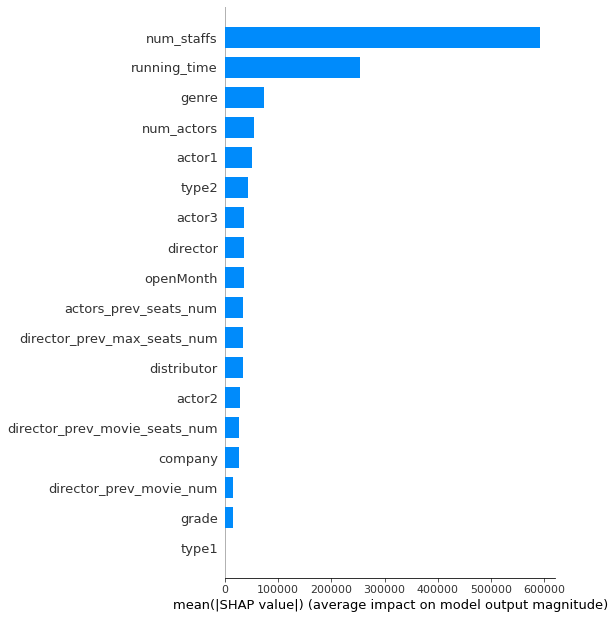

In [87]:
shap.summary_plot(shap_values, X_sample_sort_openDt.iloc[:,:-1], plot_type="bar")

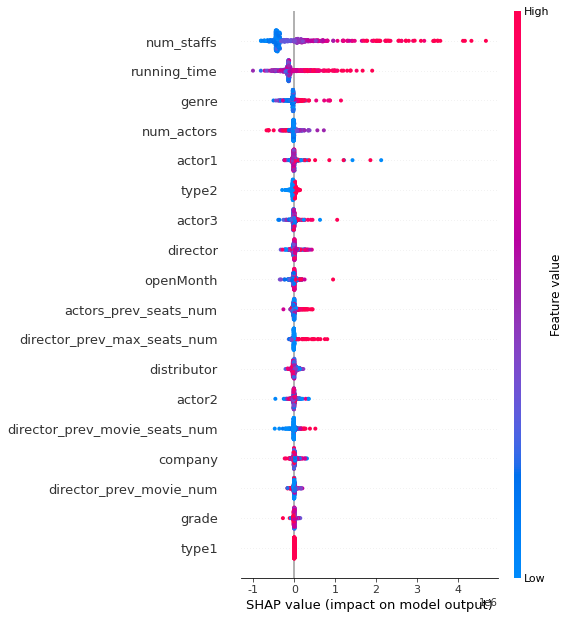

In [88]:
feature_names = ['director', 'company', 'distributor', 'type1', 'type2', 'genre', 'grade', 'num_actors', 'num_staffs', 'running_time', 
'actor1', 'actor2', 'actor3', 'openMonth', 'director_prev_movie_num', 'director_prev_movie_seats_num', 
'director_prev_max_seats_num', 'actors_prev_seats_num']

shap.summary_plot(shap_values, X_sample_sort_openDt.iloc[:,:-1], feature_names=feature_names)